In [1]:
from numpy.random import rand
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.models.regressors.gaussian_process_regressor import GaussianProcessRegressor

In [2]:
def generate(N,func,window=10,center=0 ,epsilon=1):
    x = (rand(N)-0.5) * window + center
    y = func(x)  + epsilon*np.random.randn(N)
    return x,y

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def plot_gp(X, Y, title,func_true,x_range=None,model=None,k=2,grid=300,save_dir=None):
    """kσ区間"""
    if x_range is None:
        x_range=(min(X),max(X))
    fig = plt.figure()
    #ax = fig.add_subplot(111)
    plt.scatter(X, Y, color="blue", marker="o",label="observation")
    x = np.linspace(x_range[0],x_range[1], grid)
    y_true = func_true(x)
    plt.plot(x, y_true, color='blue',label="actual")
    if model is not None:
        mu,sigma = model.calc_mu_sigma(x)
        y_std=np.sqrt(np.diag(sigma))
        mu=mu.flatten()
        plt.plot(x, mu, color='red',label="predict_mean")
        plt.fill_between(x, mu - k*y_std, mu + k*y_std, color="green", alpha=0.5, label="predict_std")
    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    if save_dir is not None:
        plt.savefig(str(save_dir/f"{title}.png"))
    plt.show()

In [4]:
class GaussianKernel:
    def __init__(self,h):
        self.h = h
        
    def run(self,x,y):
        return np.exp(-np.linalg.norm(x-y)**2/self.h)

In [5]:
f = lambda x :x* np.cos(x)

In [6]:
X,y=generate(N=10,func=f,window=50,epsilon=0)

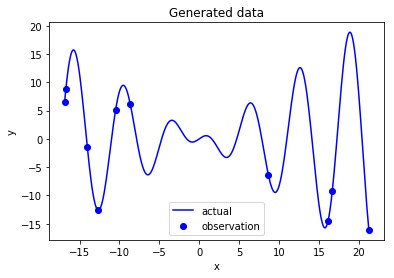

In [7]:
plot_gp(X=X,Y=y,title="Generated data",func_true=f)

In [8]:
kernel=GaussianKernel(h=0.4)
model=GaussianProcessRegressor(kernel=kernel,c=0.1)

In [9]:
model.fit(X,y)

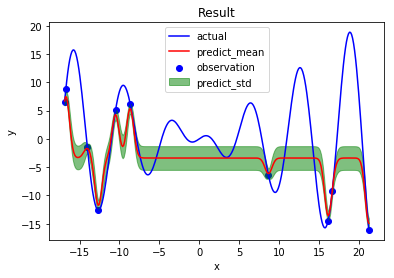

In [10]:
plot_gp(X=X,Y=y,title="Result",func_true=f,model=model)

In [15]:
from pathlib import Path
N=50
window=50
epsilon=0
kernel=GaussianKernel(h=0.4)
c=0.1
save_dir=Path("../data/images")

In [19]:
def gif_experiment(N,window,epsilon,f,kernel,c,save_dir):
    X,y=generate(N=N,func=f,window=window,epsilon=epsilon)
    x_range=(min(X)-1,max(X)+1)
    im_list=[]
    for i in range(N):
        model=GaussianProcessRegressor(kernel=kernel,c=0.1)
        model.fit(X[:i+1],y[:i+1])
        plot_gp(X=X[:i+1],Y=y[:i+1],title=f"Observation : {i+1:2d}",func_true=f,model=model,x_range=x_range,save_dir=save_dir)

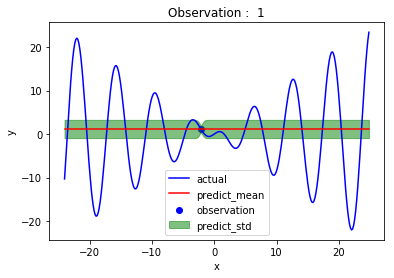

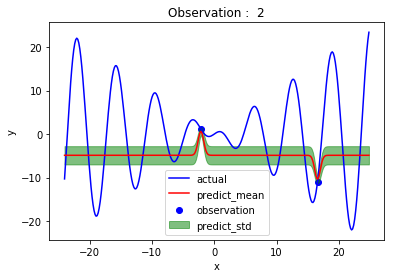

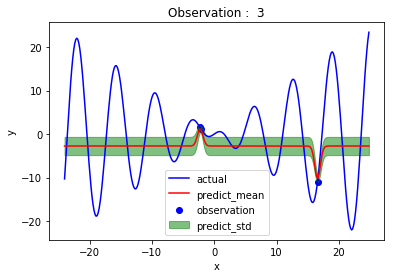

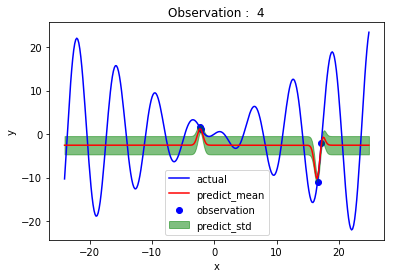

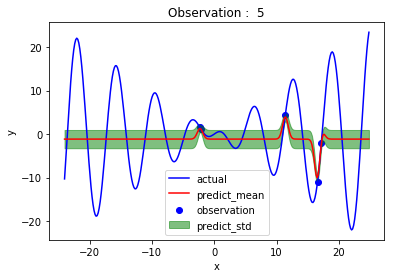

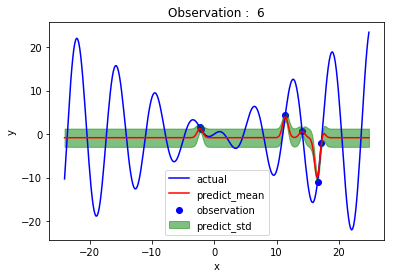

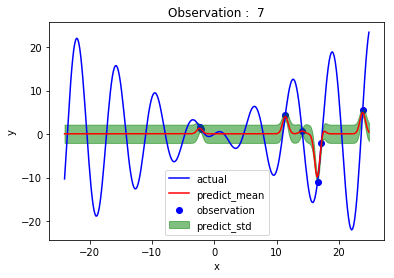

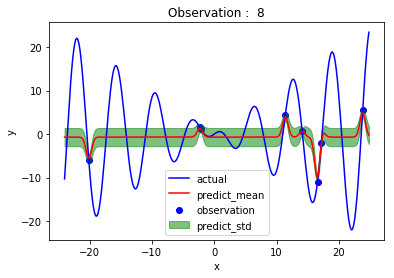

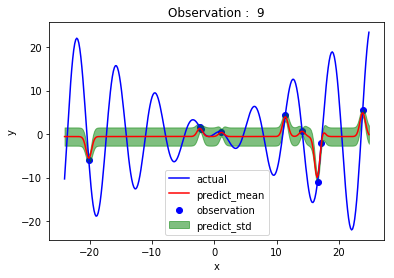

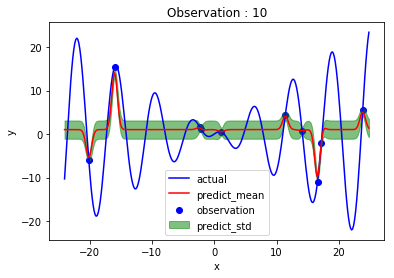

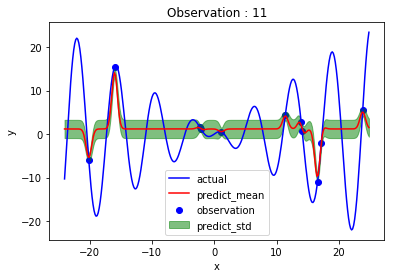

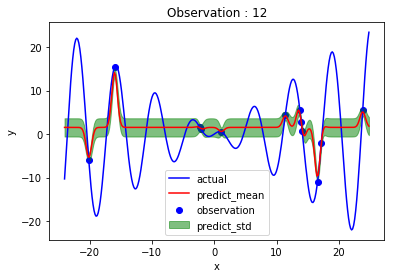

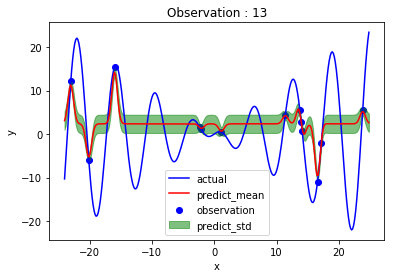

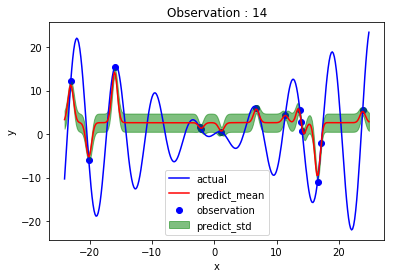

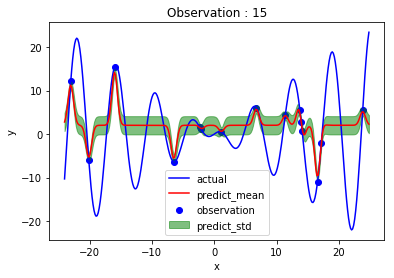

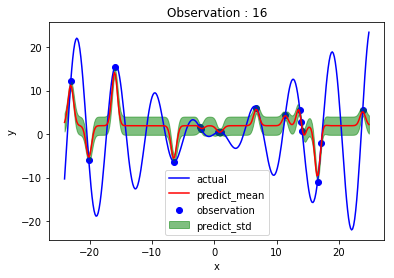

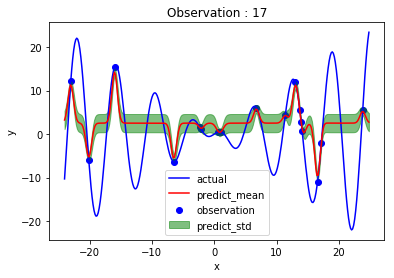

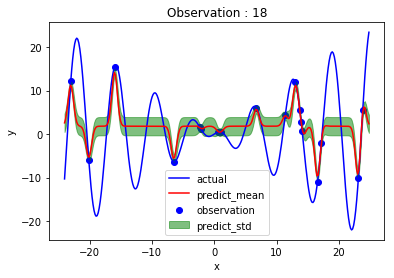

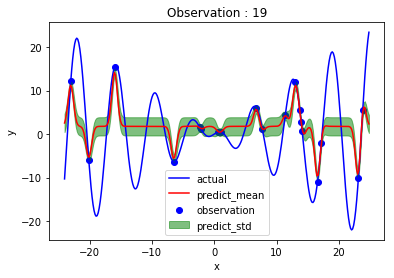

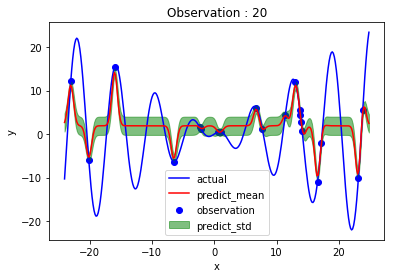

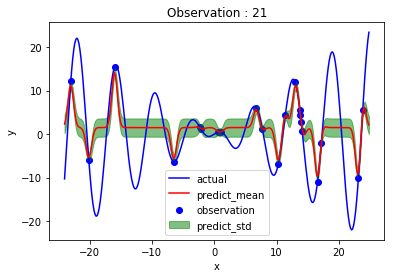

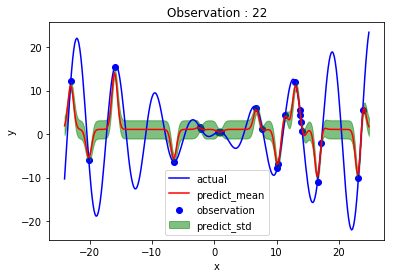

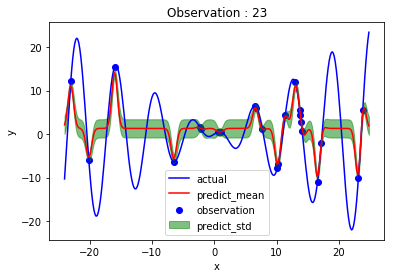

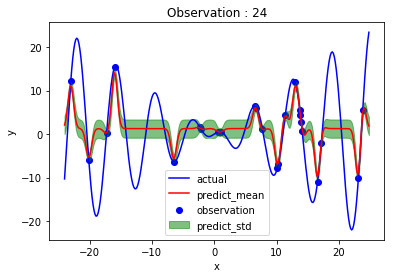

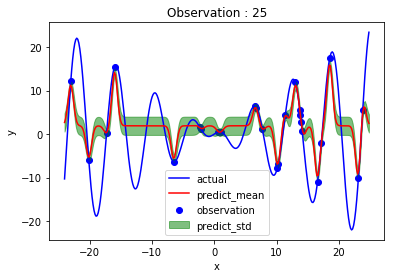

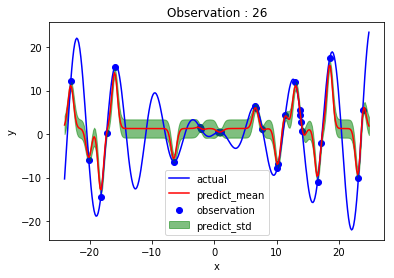

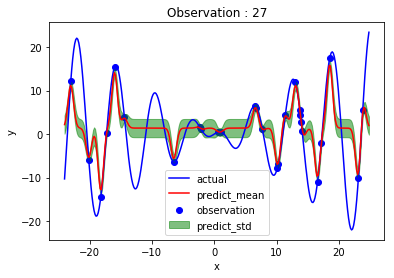

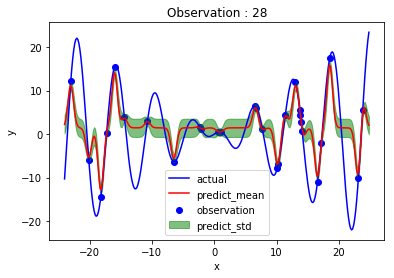

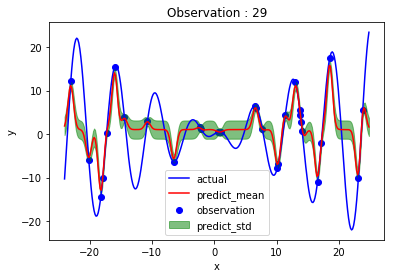

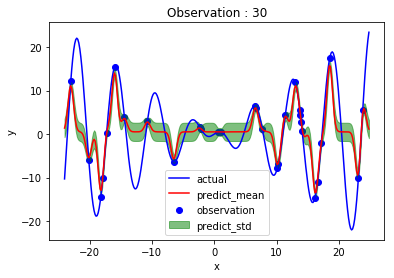

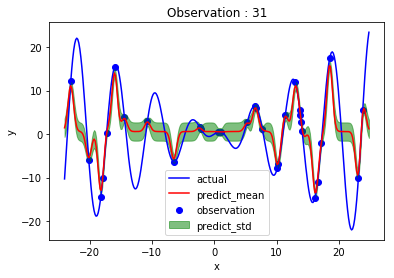

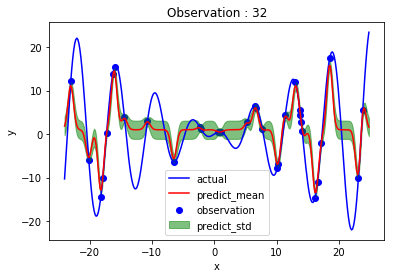

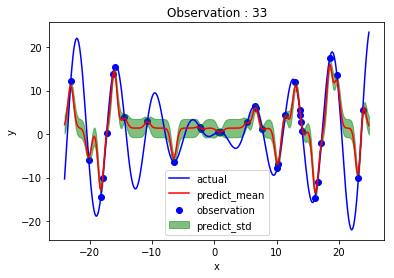

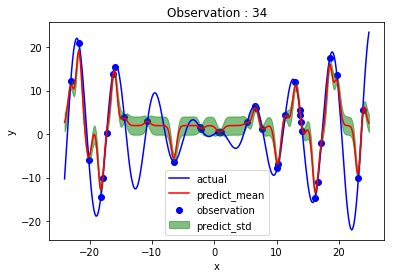

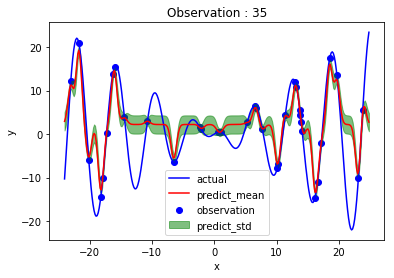

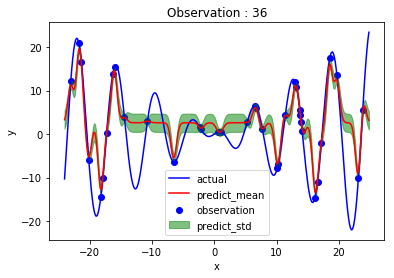

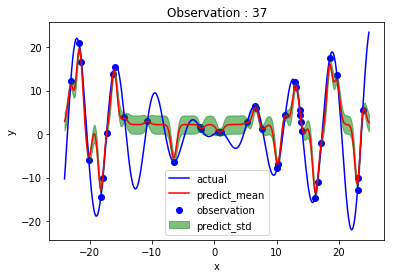

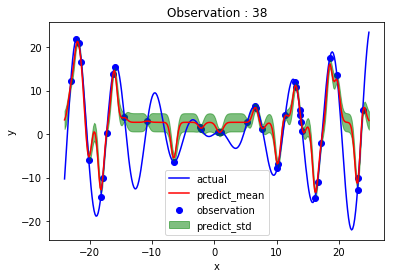

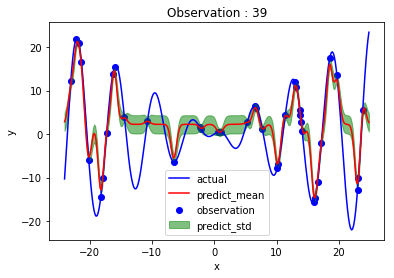

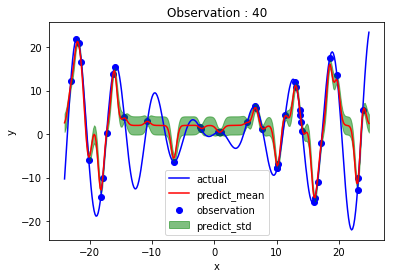

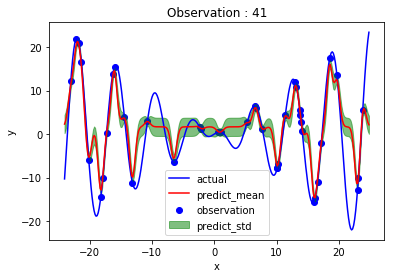

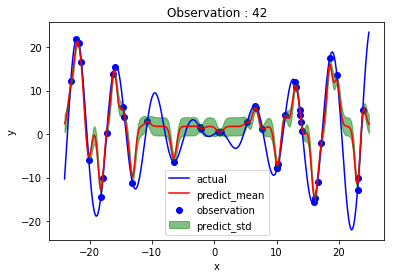

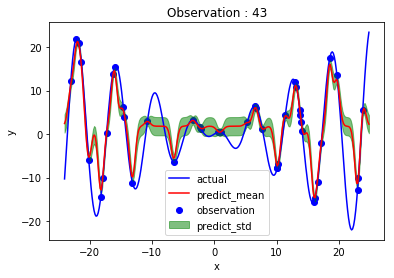

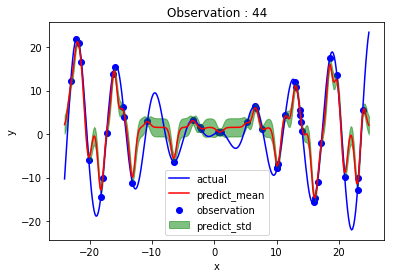

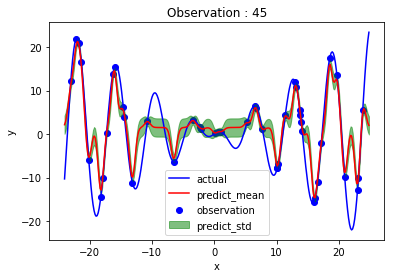

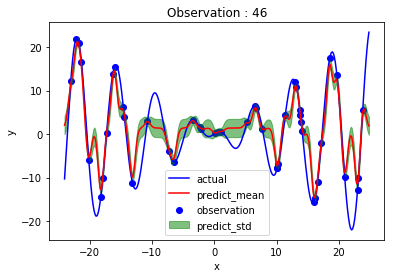

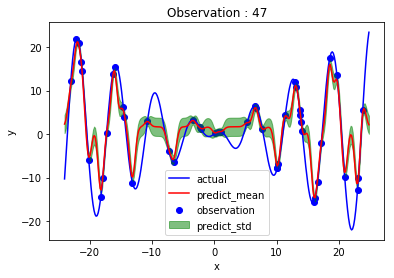

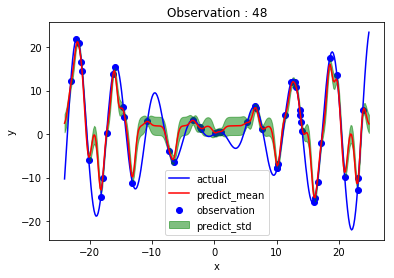

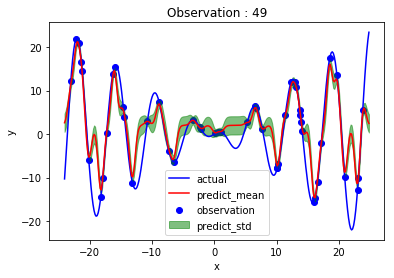

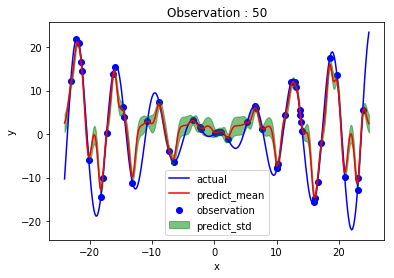

In [21]:
gif_experiment(N,window,epsilon,f,kernel,c,save_dir)